In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
model_A = keras.models.load_model("../Models/1_ImageClassify_A/")

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()
X_train_full=X_train_full[...,np.newaxis]
X_test=X_test[...,np.newaxis]
X_valid,X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test/255.0
class_names = ["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]


In [16]:
#model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
#model_B_on_A.add(keras.layers.Dense(10,activation="softmax"))
model_B_on_A = model_A


In [17]:
optimizer = keras.optimizers.SGD(learning_rate=0.1,decay=1e-3,nesterov=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=2)

In [20]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable=True
dropout_model = keras.models.Sequential([model_B_on_A.layers[0],
                                         model_B_on_A.layers[1],
                                        keras.layers.Dropout(rate=.2),
                                        model_B_on_A.layers[3],
                                        keras.layers.Dropout(rate=.15),
                                        model_B_on_A.layers[4]])
model_B_on_A.compile(loss = "sparse_categorical_crossentropy",
                     optimizer = optimizer,metrics=["accuracy"])
dropout_model.compile(loss = "sparse_categorical_crossentropy",
                     optimizer = optimizer,metrics=["accuracy"])
#model_B_on_A.summary()
dropout_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout_12 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_13 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
________________________________________________

In [21]:
model_B_on_A.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics="accuracy")
history = dropout_model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),callbacks=lr_scheduler)


Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4398 - accuracy: 0.8481 - val_loss: 0.3430 - val_accuracy: 0.8668
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2966 - accuracy: 0.8910 - val_loss: 0.2950 - val_accuracy: 0.8916
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2585 - accuracy: 0.9063 - val_loss: 0.2898 - val_accuracy: 0.8956
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2389 - accuracy: 0.9115 - val_loss: 0.2840 - val_accuracy: 0.9004
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2282 - accuracy: 0.9146 - val_loss: 0.2784 - val_accuracy: 0.9000
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2182 - accuracy: 0.9196 - val_loss: 0.2911 - val_accuracy: 0.8954
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2093 - accuracy: 0.9221 - val_loss: 0.2829 - val_accuracy:

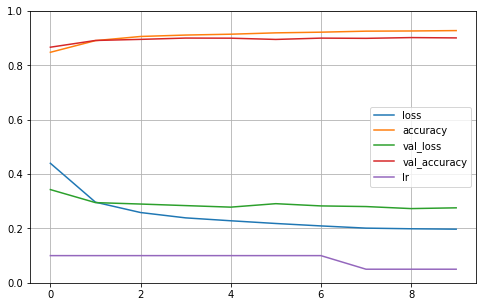

1719/1719 [==============================] - 2s 1ms/step - loss: 0.1437 - accuracy: 0.9497


[0.14369355142116547, 0.9497272968292236]

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
#model_B_on_A.save("../Models/1_ImageClassify_A")
#dropout_model.save("../Models/1_ImageClassify_A")
dropout_model.evaluate(X_train,y_train)